In [221]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf

In [222]:
SYMBOL = "EURUSD=X"
START_DATE = "2019-01-01"
END_DATE = "2023-08-01"

prices = yf.download(SYMBOL, START_DATE, END_DATE)
prices.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1.149425,1.155001,1.146500,1.149306,1.149306,0
2019-01-02,1.146132,1.149700,1.134572,1.146171,1.146171,0
2019-01-03,1.131734,1.140914,1.131734,1.131811,1.131811,0
2019-01-04,1.139095,1.141774,1.134816,1.139108,1.139108,0
2019-01-07,1.141292,1.147447,1.140524,1.141044,1.141044,0


In [223]:
prices = prices["Close"]
prices.head()

Date
2019-01-01    1.149306
2019-01-02    1.146171
2019-01-03    1.131811
2019-01-04    1.139108
2019-01-07    1.141044
Name: Close, dtype: float64

In [224]:
returns = prices.pct_change().dropna()
returns = returns.rolling(window=30).mean().dropna()
returns.head()

Date
2019-02-12   -0.000617
2019-02-13   -0.000361
2019-02-14   -0.000149
2019-02-15   -0.000274
2019-02-18   -0.000322
Name: Close, dtype: float64

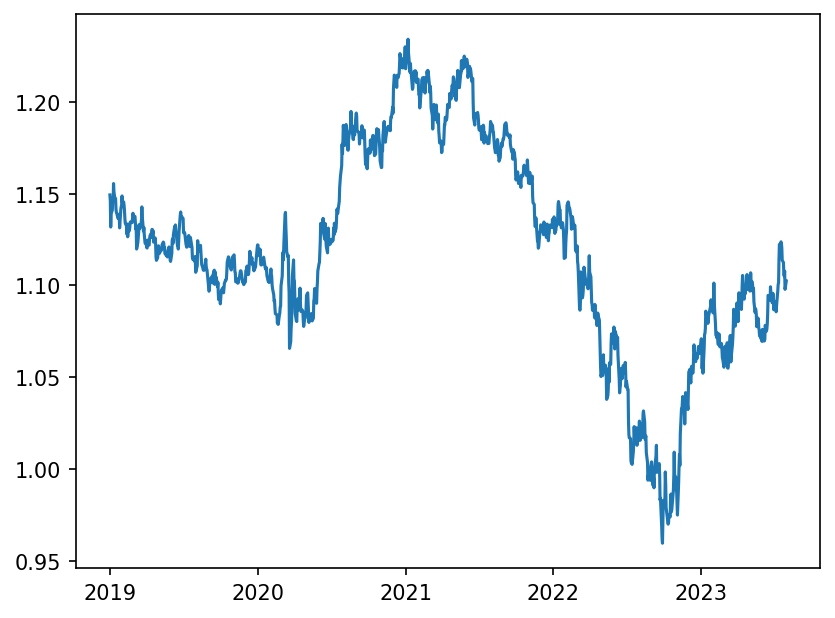

In [225]:
_ = plt.figure(dpi=150)
plt.plot(prices.index, prices)
plt.show()

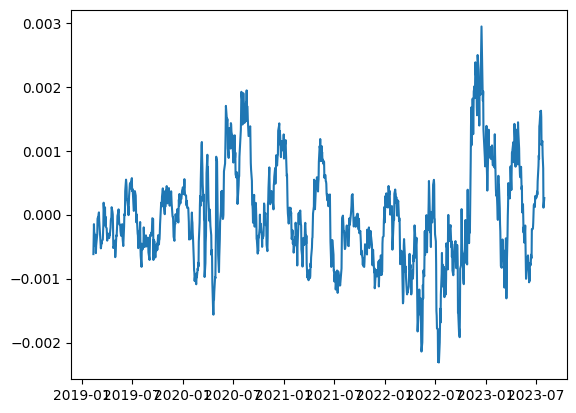

In [226]:
_ = plt.plot(dpi=150)
plt.plot(returns.index, returns)
plt.show()

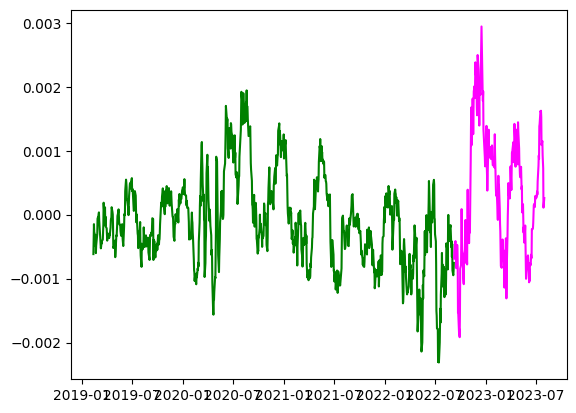

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

n_observations = len(returns)

returns_train = returns.iloc[:int(0.8 * n_observations)]
returns_test = returns.iloc[int(0.8 * n_observations):]

_ = plt.plot(dpi=150)
plt.plot(returns_train.index, returns_train, c="green")
plt.plot(returns_test.index, returns_test, c="magenta")
plt.show()

In [228]:
X_train = returns_train.index.values
y_train = returns_train.values

X_test = returns_test.index.values 
y_test = returns_test.values 

X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((931,), (931,), (233,), (233,))

In [229]:
# Convert values to Python datetime objects
X_train = pd.to_datetime(X_train)

# Convert Python datetime to timestamp 
X_train = [x.timestamp() for x in X_train]

# Convert the timestamp list into an np.array
X_train = np.array(X_train)

# Reshape into a single dependent variable format (as required by scikit-learn)
X_train = X_train.reshape(-1, 1)

# Convert values to Python datetime objects
X_test = pd.to_datetime(X_test)

# Convert Python datetime to timestamp 
X_test = [x.timestamp() for x in X_test]

# Convert the timestamp list into an np.array
X_test = np.array(X_test)

# Reshape into a single dependent variable format (as required by scikit-learn)
X_test = X_test.reshape(-1, 1)

X_train[0], X_test[0]


(array([1.5499296e+09]), array([1.6625952e+09]))

In [230]:
model.fit(X_train, y_train)

LinearRegression()

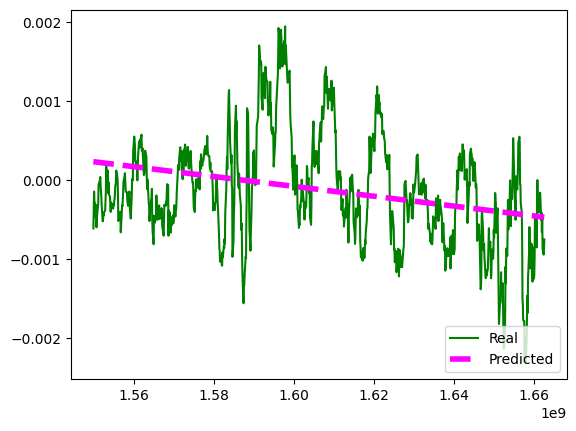

In [231]:
y_train_pred = model.predict(X_train)

_ = plt.plot(dpi=150)
plt.plot(X_train, y_train, c="green", label="Real")
plt.plot(X_train, y_train_pred, c="magenta", label="Predicted", linestyle="dashed", linewidth=4)
plt.legend(loc="lower right")
plt.show()

In [232]:
model.coef_, model.intercept_

(array([-6.24486265e-12]), 0.009908119299039987)

In [233]:
mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)

print(f"{mse=}")
print(f"{mae=}")

mse=4.383548777185626e-07
mae=0.0005210948829871521


In [234]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

ind_variable1 = np.sin(X_train_scaled)
ind_variable2 = np.sin(10*X_train_scaled)
ind_variable3 = np.power(X_train_scaled, 2)
ind_variable4 = np.cos(X_train_scaled)
ind_variable5 = np.power(ind_variable2, 3)
ind_variable6 = np.log(X_train_scaled)
ind_variable6[np.where(ind_variable6 == -np.inf)] = -1
ind_variable7 = np.exp(X_train_scaled)

# ind_variable5 = np.exp(X_train_scaled)
X_train_augmented = np.concatenate([X_train_scaled,
                                    ind_variable1, 
                                    ind_variable2, 
                                    ind_variable3,
                                    ind_variable4,
                                    ind_variable5,
                                    ind_variable6,
                                    ind_variable7
                                    ], axis=1)
X_train_augmented.shape, X_train_augmented[:2]

/var/folders/bj/29t6z1r11lb7j3cmky0fs7p80000gn/T/ipykernel_5647/1824163469.py:13: RuntimeWarning: divide by zero encountered in log
  ind_variable6 = np.log(X_train_scaled)


((931, 8),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         -1.00000000e+00,  1.00000000e+00],
        [ 7.67459708e-04,  7.67459633e-04,  7.67452175e-03,
          5.88994404e-07,  9.99999706e-01,  4.52016162e-07,
         -7.17242458e+00,  1.00076775e+00]]))

In [235]:
model = LinearRegression()
model.fit(X_train_augmented, y_train)
y_train_pred = model.predict(X_train_augmented)

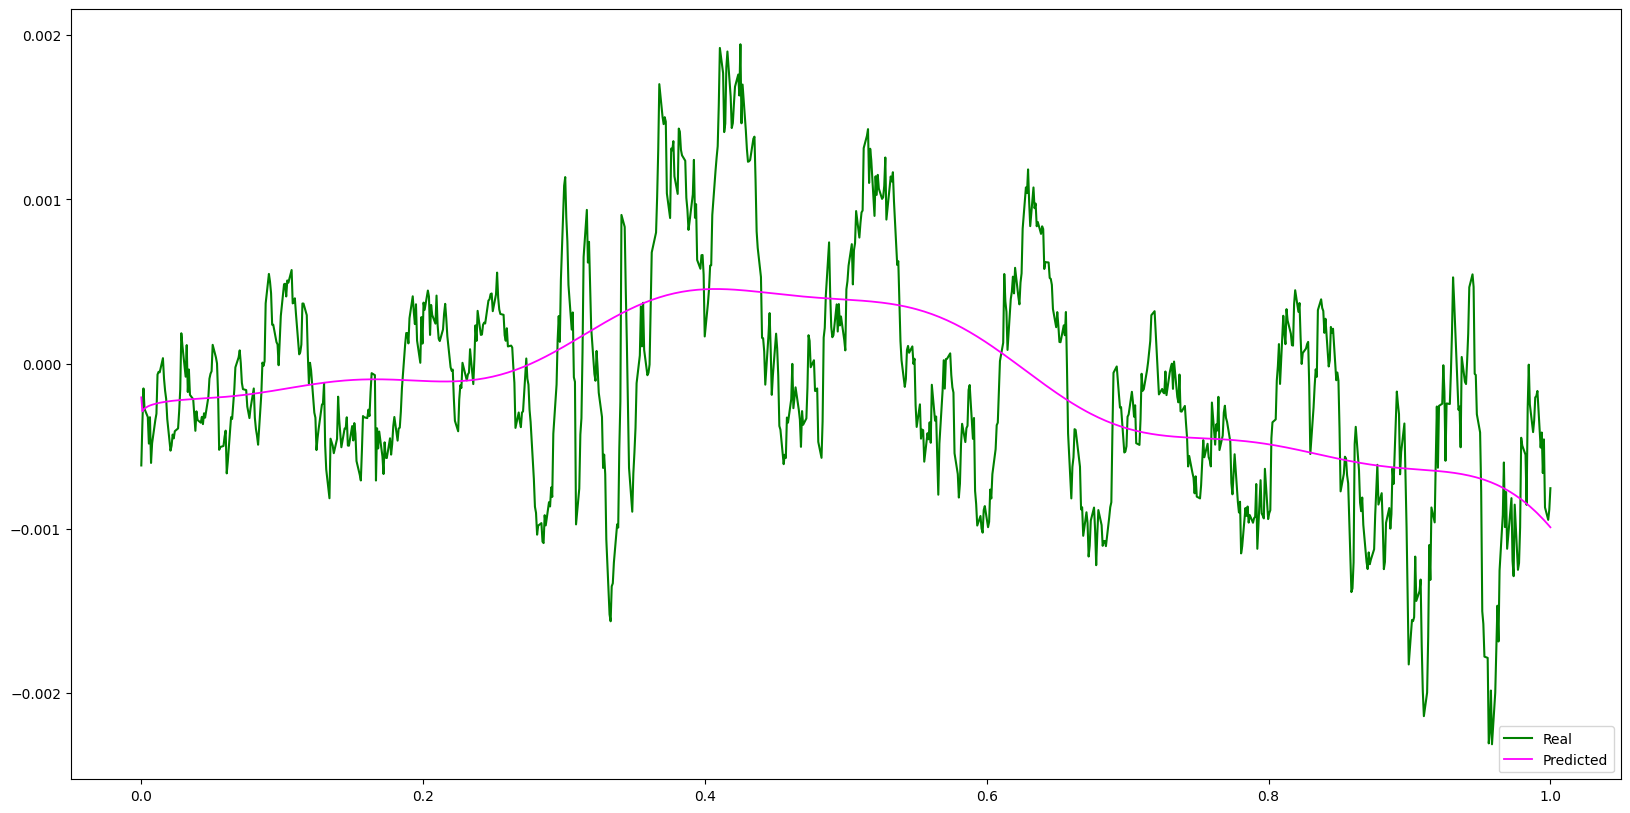

In [236]:
_ = plt.figure(figsize=(20, 10))
plt.plot(X_train_scaled, y_train, c="green", label="Real")
plt.plot(X_train_scaled, y_train_pred, c="magenta", label="Predicted", linewidth=1.3)
plt.legend(loc="lower right")
plt.show()

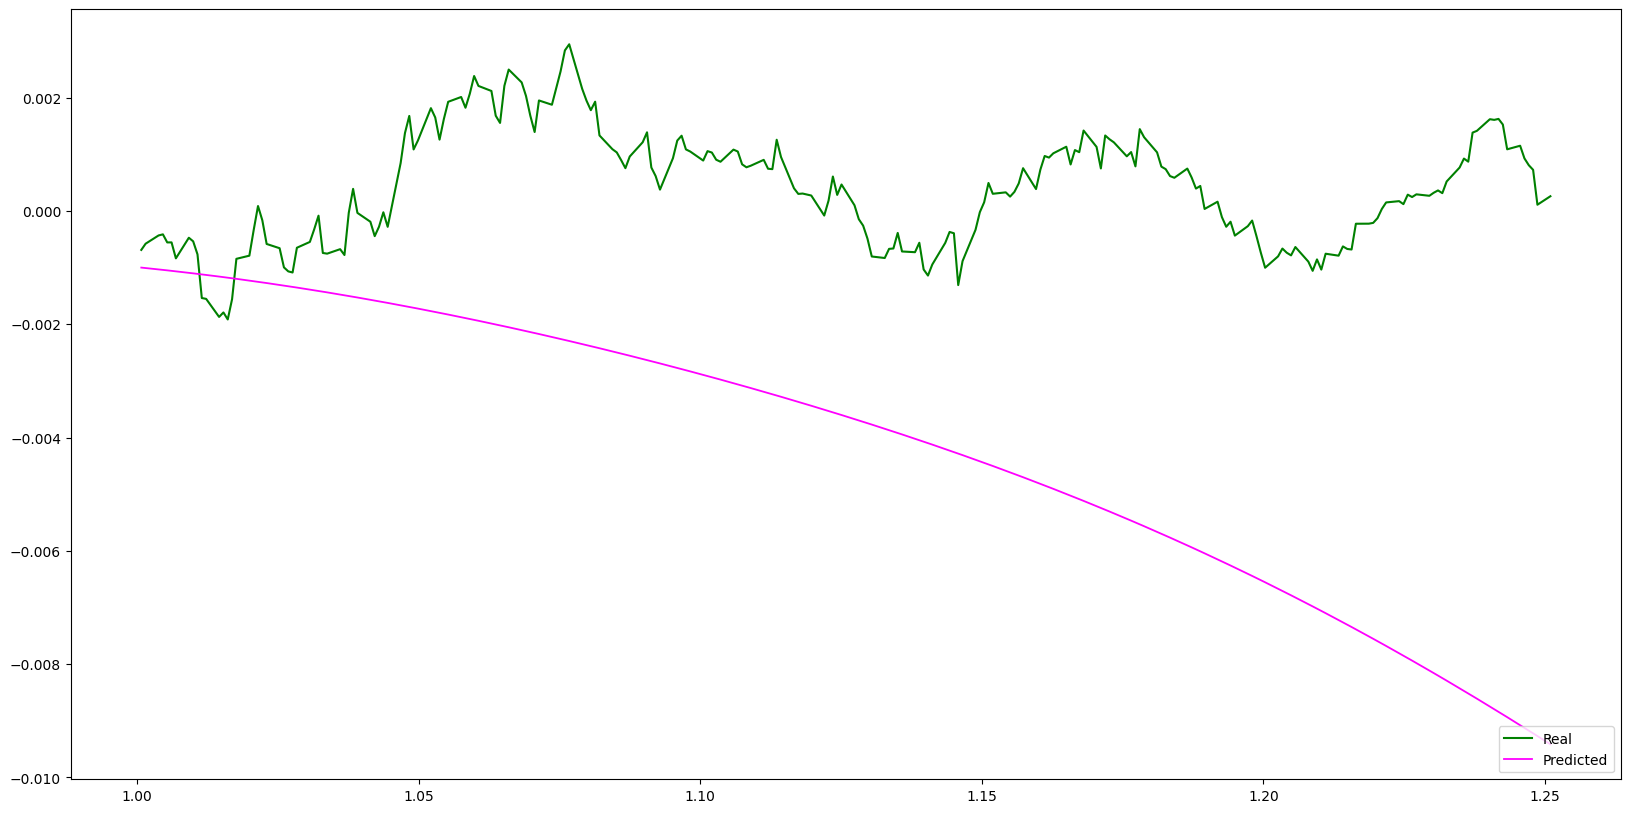

In [237]:
ind_variable1 = np.sin(X_test_scaled)
ind_variable2 = np.sin(10*X_test_scaled)
ind_variable3 = np.power(X_test_scaled, 2)
ind_variable4 = np.cos(X_test_scaled)
ind_variable5 = np.power(ind_variable2, 3)
ind_variable6 = np.log(X_test_scaled)
ind_variable6[np.where(ind_variable6 == -np.inf)] = -1
ind_variable7 = np.exp(X_test_scaled)
X_test_augmented = np.concatenate([X_test_scaled,
                                    ind_variable1, 
                                    ind_variable2, 
                                    ind_variable3,
                                    ind_variable4,
                                    ind_variable5,
                                    ind_variable6,
                                    ind_variable7
                                    ], axis=1)

y_test_pred = model.predict(X_test_augmented)

_ = plt.figure(figsize=(20, 10))
plt.plot(X_test_scaled, y_test, c="green", label="Real")
plt.plot(X_test_scaled, y_test_pred, c="magenta", label="Predicted", linewidth=1.3)
plt.legend(loc="lower right")
plt.show()

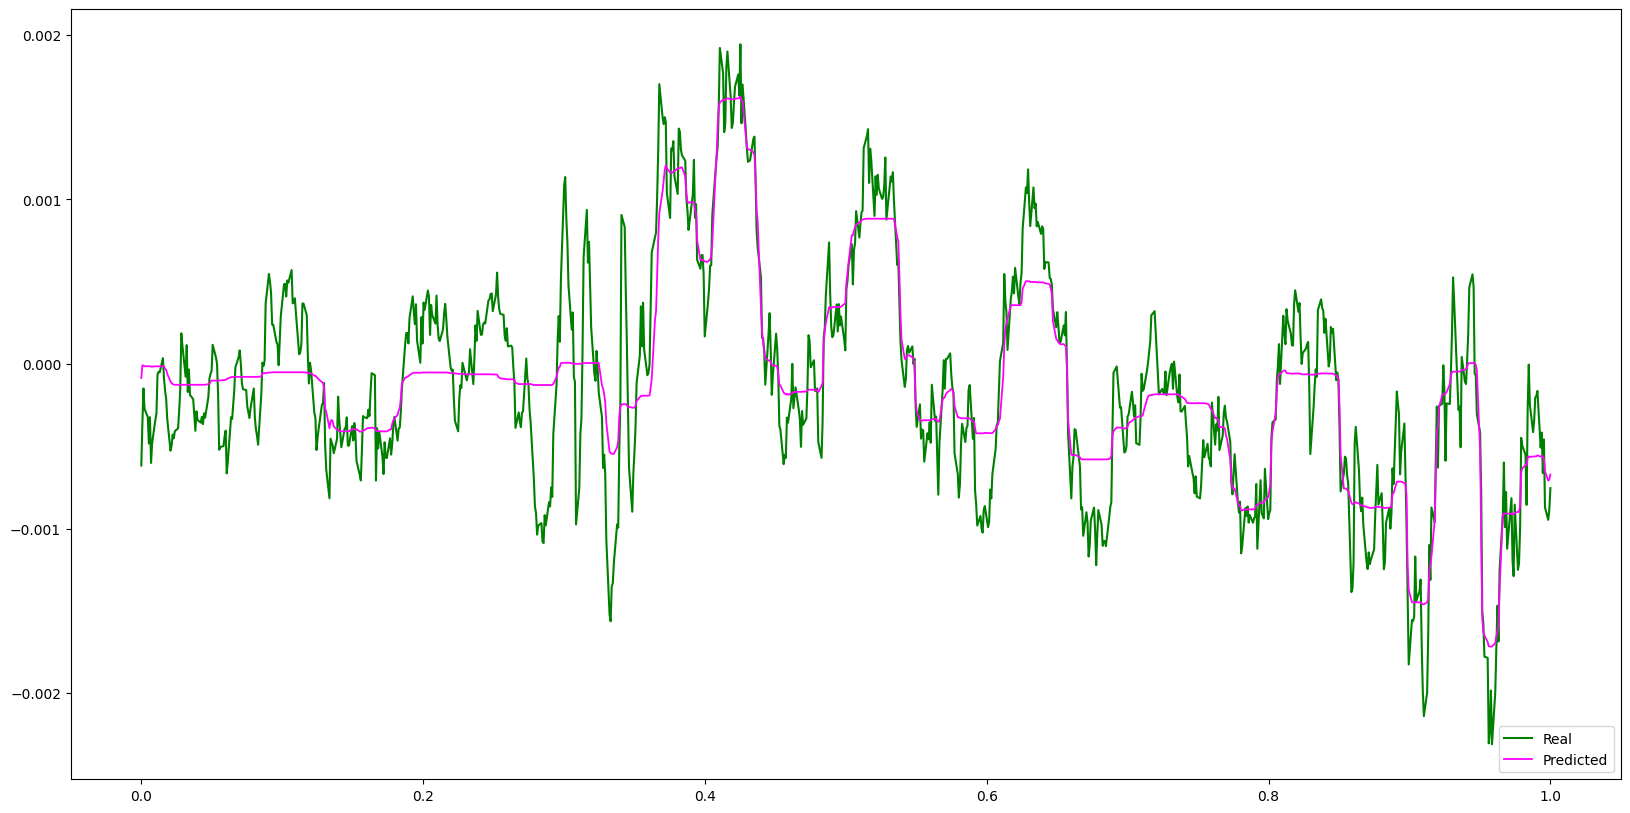

In [238]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=250, max_depth=5)
forest.fit(X_train_augmented, y_train)

y_train_pred = forest.predict(X_train_augmented)

_ = plt.figure(figsize=(20, 10))
plt.plot(X_train_scaled, y_train, c="green", label="Real")
plt.plot(X_train_scaled, y_train_pred, c="magenta", label="Predicted", linewidth=1.3)
plt.legend(loc="lower right")
plt.show()


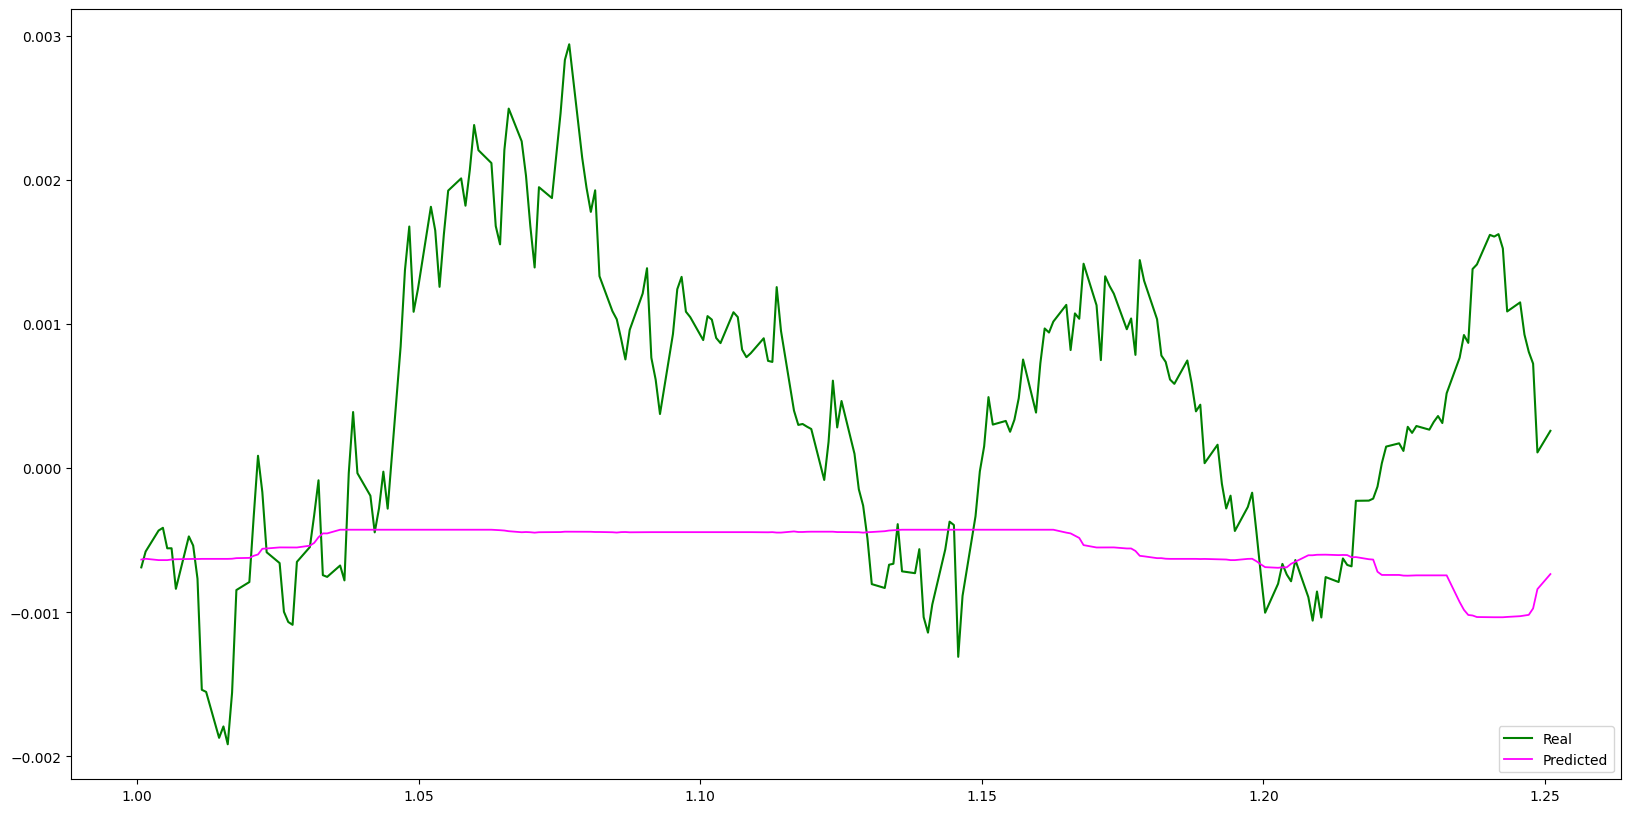

In [239]:
y_test_pred = forest.predict(X_test_augmented)

_ = plt.figure(figsize=(20, 10))
plt.plot(X_test_scaled, y_test, c="green", label="Real")
plt.plot(X_test_scaled, y_test_pred, c="magenta", label="Predicted", linewidth=1.3)
plt.legend(loc="lower right")
plt.show()

In [240]:
n_estimators = [140, 150, 160]
max_depth = [3, 4, 5, 6, 7, 10]

models_container = []
models_performance = []

for ne in n_estimators:
    for md in max_depth:
        model = RandomForestRegressor(n_estimators=ne, max_depth=md)
        model.fit(X_train_augmented, y_train)

        y_pred = model.predict(X_test_augmented)

        error = mean_squared_error(y_true=y_test, y_pred=y_pred)

        models_container.append(model)
        models_performance.append(error)

In [241]:
best_performance = np.min(models_performance)
print(f"{best_performance=}")

best_performance=1.5706149049714321e-06


In [242]:
for i in range(len(models_performance)):
    if models_performance[i] == best_performance:
        break

best_model = models_container[i]
best_model

RandomForestRegressor(max_depth=3, n_estimators=140)

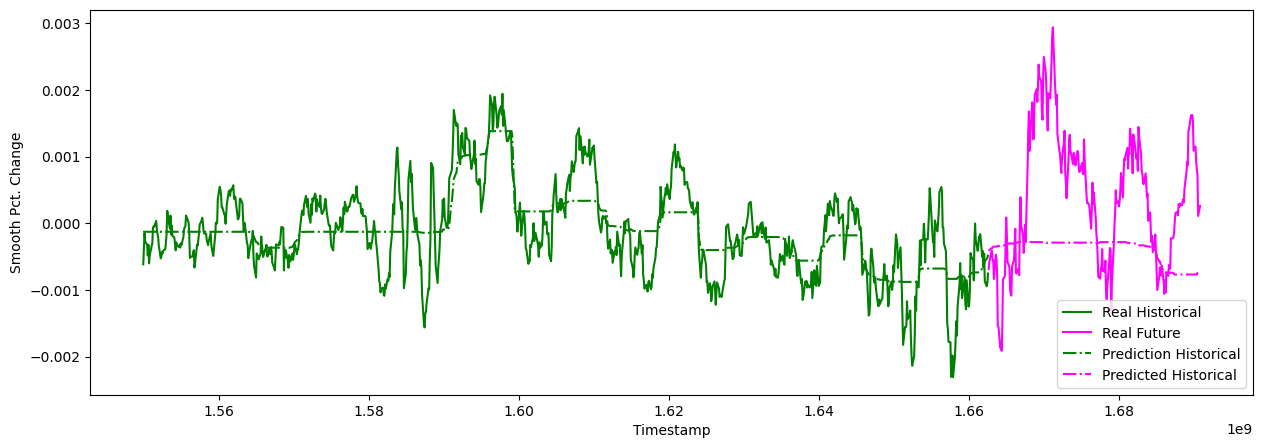

In [243]:
y_train_pred = best_model.predict(X_train_augmented)
y_test_pred = best_model.predict(X_test_augmented)


_ = plt.figure(figsize=(15, 5))
plt.plot(X_train, y_train, label="Real Historical", c="green")
plt.plot(X_test, y_test, label="Real Future", c="magenta")
plt.plot(X_train, y_train_pred, label="Prediction Historical", c="green", linestyle="-.")
plt.plot(X_test, y_test_pred, label="Predicted Historical", c="magenta", linestyle="-.")
plt.xlabel("Timestamp")
plt.ylabel("Smooth Pct. Change")
plt.legend(loc="lower right")
plt.show()